In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

#Description des données

In [0]:
# Load the passenger data
test_df = pd.read_csv ("test.csv") 
train_df = pd.read_csv ("train.csv")
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
train_df.describe ()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


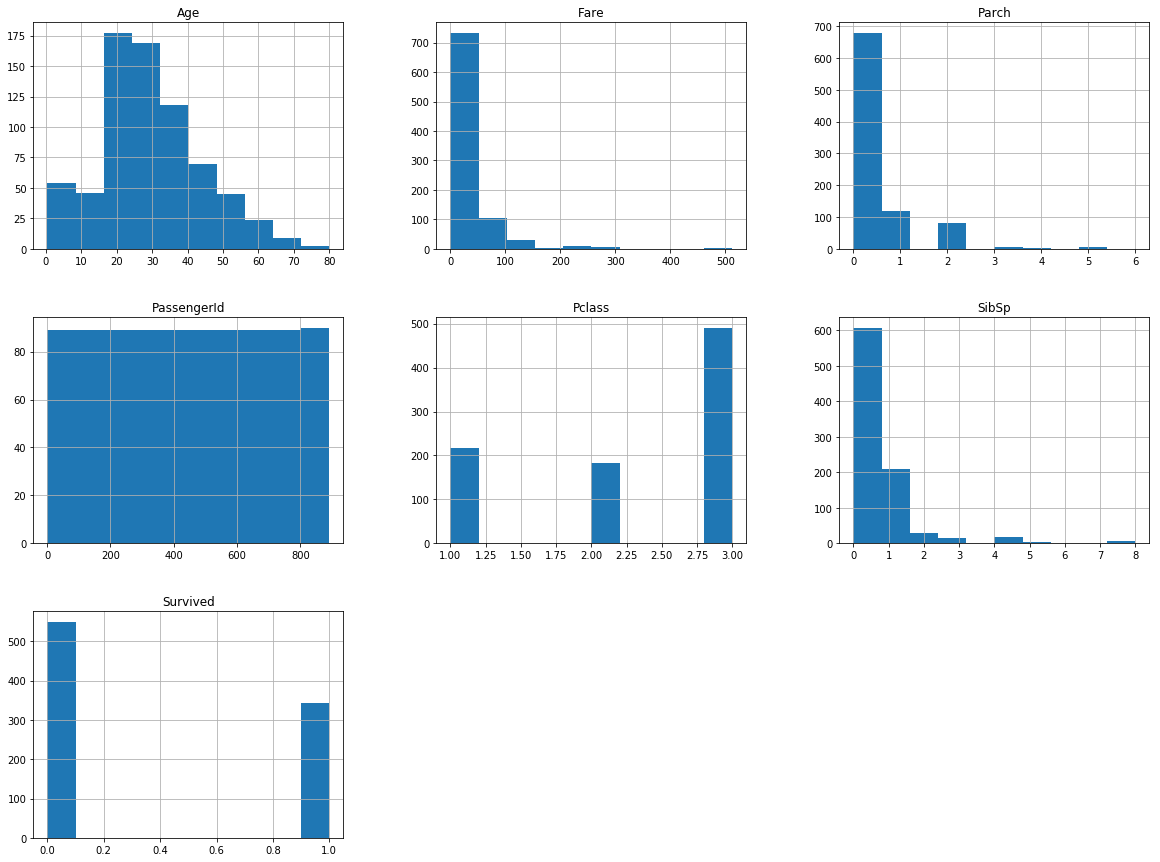

In [0]:
train_df.hist(figsize=(20,15))
plt.show()

In [0]:
train_df['Survived'].mean()

0.3838383838383838

In [0]:
train_df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


Ci-dessus, nous pouvons voir que:

*  38% de l'ensemble d'entraînement ont survécu au Titanic . 
*  Nous pouvons également constater que les âges des passagers varient de 0,4 à 80 ans.
*  les passagers en première classe avaient 62% de chances de survie, contre 25,5% pour ceux en 3e classe. 
*   Élément de liste



# **Traitement des données**

### Colonne PassengerId, tickets et Cabine

In [0]:
train_df = train_df.drop(['PassengerId','Ticket','Cabin', 'Name'], axis=1)
#train_df = train_df.drop (['Ticket'], axis=1)

### Colonne Sexe

Mise à jour de la colonne sexe en numérique:

In [0]:
train_df['Sex']= train_df['Sex'].map({'male':0,'female':1})

print(train_df['Sex'].head())

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


### Colonne Age

In [0]:
train_df["Age"].isnull().sum()

177

In [0]:
# Fill the nan values in the age column
train_df['Age'].fillna(value= round(train_df['Age'].mean()), inplace=True)

In [0]:
train_df["Age"].isnull().sum()

0

# Modèle d'apprentissage

In [0]:
# Create a first class column
train_df['FirstClass']= train_df['Pclass'].apply(lambda p: 1 if p ==1 else 0)

# Create a second class column
train_df['SecondClass']= train_df['Pclass'].apply(lambda p: 1 if p ==1 else 0)

# Select the desired features
features= train_df [['Sex', 'Age', 'FirstClass', 'SecondClass']]
survival= train_df['Survived']

# Perform train, test, split
train_features, test_features, train_labels, test_labels=train_test_split(features, survival)

# Scale the feature data so it has mean = 0 and standard deviation = 1
scaler= StandardScaler()
train_features= scaler.fit_transform(train_features)
test_features= scaler.transform(test_features)

In [0]:
# Create and train the model
model= LogisticRegression()
# Score the model on the train data
model.fit(train_features, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Score the model on the test data
model.score(test_features, test_labels)


0.8071748878923767

In [0]:
# Analyze the coefficients
model.coef_
list(zip(['Sex','Age','FirstClass','SecondClass'],model.coef_[0]))



[('Sex', 1.173646791099671),
 ('Age', -0.2665492835419995),
 ('FirstClass', 0.3698544556607646),
 ('SecondClass', 0.3698544556607646)]

In [0]:
#Test du modèle

# Sample passenger features
Jack = np.array([0.0,20.0,0.0,0.0])
Rose = np.array([1.0,17.0,1.0,0.0])
You = np.array([0.0, 45.0 , 1.0, 0.0])

# Combine passenger arrays
sample_passengers= np.array([Jack, Rose, You])

# Scale the sample passenger features
scaler= StandardScaler().fit(sample_passengers)
sample_passengers= scaler.transform(sample_passengers)
print(sample_passengers)

[[-0.70710678 -0.58423096 -1.41421356  0.        ]
 [ 1.41421356 -0.82323453  0.70710678  0.        ]
 [-0.70710678  1.40746549  0.70710678  0.        ]]


In [0]:
# Make survival predictions!
print(model.predict(sample_passengers))
print(model.predict_proba(sample_passengers))

[0 1 0]
[[0.8566258  0.1433742 ]
 [0.17502509 0.82497491]
 [0.82256873 0.17743127]]


https://www.codecademy.com/paths/data-science/tracks/dspath-supervised/modules/dspath-logistic-regression/projects/logistic-regression-titanic

https://www.kaggle.com/c/titanic/data

http://www.datacorner.fr/xgboost/

https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

https://towardsdatascience.com/kaggle-titanic-machine-learning-model-top-7-fa4523b7c40

https://blog.socialcops.com/technology/data-science/machine-learning-python/

http://www.bittenbypython.com/machine-learning-kaggle-titanic.html

https://seaborn.pydata.org/tutorial/categorical.html#statistical-estimation-within-categories